In [ ]:
!pip install pandas scikit-learn tensorflow xgboost matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Load the dataset
data = pd.read_csv('/content/civildataset.csv')

# Basic exploration
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nData types and missing values:")
print(data.info())
print("\nDescriptive statistics:")
print(data.describe())

Dataset shape: (992, 9)

First 5 rows:
   FiberContent   AspectRatio  FiberLength   fineAggregate  coarseAggregate  \
0           0.00     0.000000           0.0          751.5           1012.5   
1            NaN          NaN           NaN            NaN              NaN   
2          47.10    46.666667          35.0          751.5           1012.5   
3          70.65    46.666667          35.0          751.5           1012.5   
4           0.00     0.000000           0.0          785.0           1093.0   

   water  AdditiveContent  CementeContent  CompressiveStrength  
0  162.0              0.0           450.0                47.77  
1    NaN              NaN             NaN                51.22  
2  162.0              0.0           450.0                54.22  
3  162.0              0.0           450.0                57.11  
4  178.0              0.0           324.0                36.50  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0

In [ ]:
# Drop rows with all NaN values (empty rows)
data = data.dropna(how='all')

# Drop rows where CompressiveStrength is NaN (target variable missing)
data = data.dropna(subset=['CompressiveStrength'])

# Fill remaining NaN values with 0 (for features)
data = data.fillna(0)

# Reset index after cleaning
data = data.reset_index(drop=True)

# Check for missing values
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
FiberContent           0
AspectRatio            0
FiberLength            0
fineAggregate          0
coarseAggregate        0
water                  0
AdditiveContent        0
CementeContent         0
CompressiveStrength    0
dtype: int64


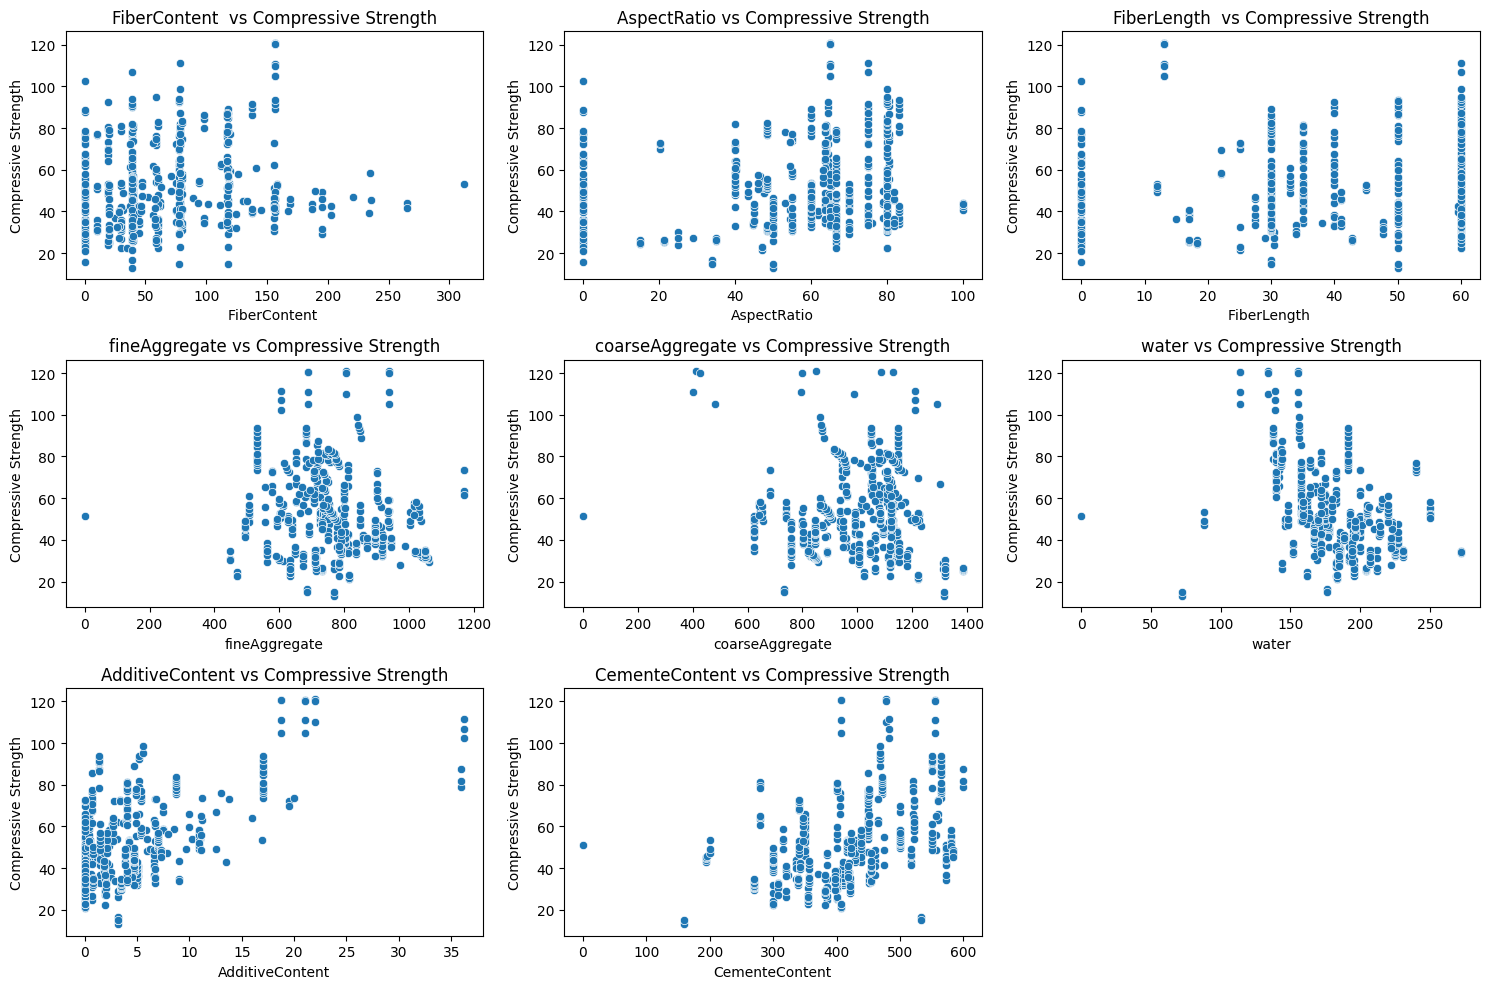

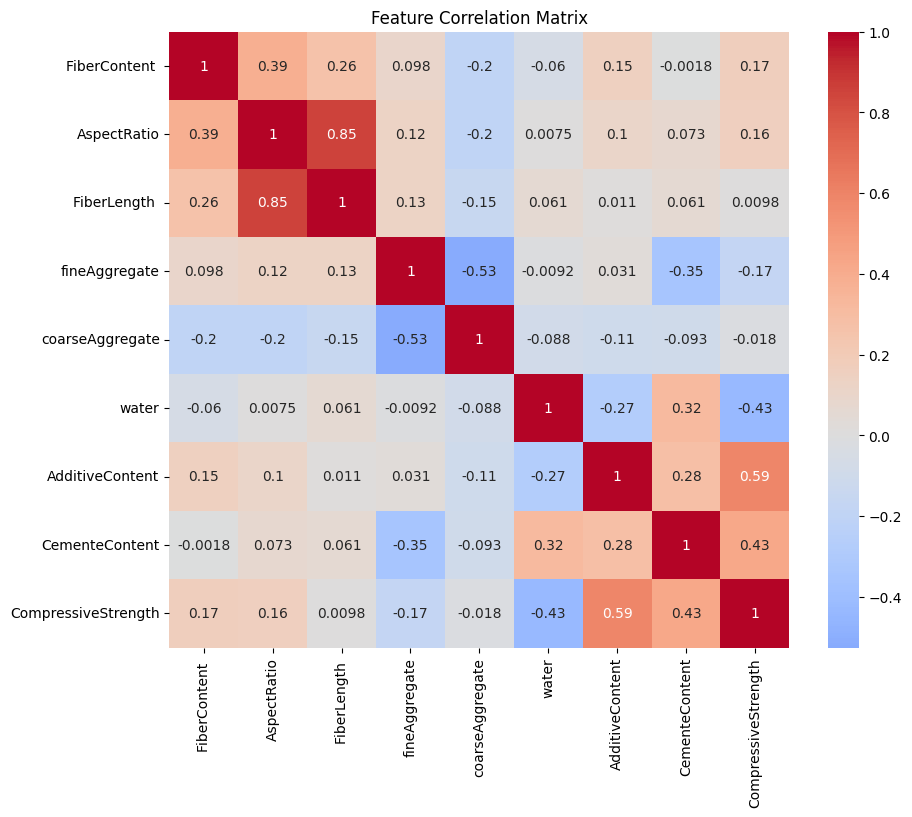

In [ ]:
# Set up the figure
plt.figure(figsize=(15, 10))

# Plot each feature against compressive strength
for i, column in enumerate(data.columns[:-1]):  # Exclude target column
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=data[column], y=data['CompressiveStrength'])
    plt.title(f'{column} vs Compressive Strength')
    plt.xlabel(column)
    plt.ylabel('Compressive Strength')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Separate features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # Last column (CompressiveStrength)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3620.2009 - val_loss: 3009.2622
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3483.1526 - val_loss: 2894.3770
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2981.2029 - val_loss: 2684.2556
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3096.3906 - val_loss: 2314.4412
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2425.8518 - val_loss: 1747.6572
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1811.2699 - val_loss: 1069.0618
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1092.0488 - val_loss: 595.9722
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 569.4265 - val_loss: 526.9579
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 436.1766 - val_loss: 486.3205
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 350.1884 - val_loss: 439.6497
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 309.0214 - val_loss: 432.1902
Epoch 12/

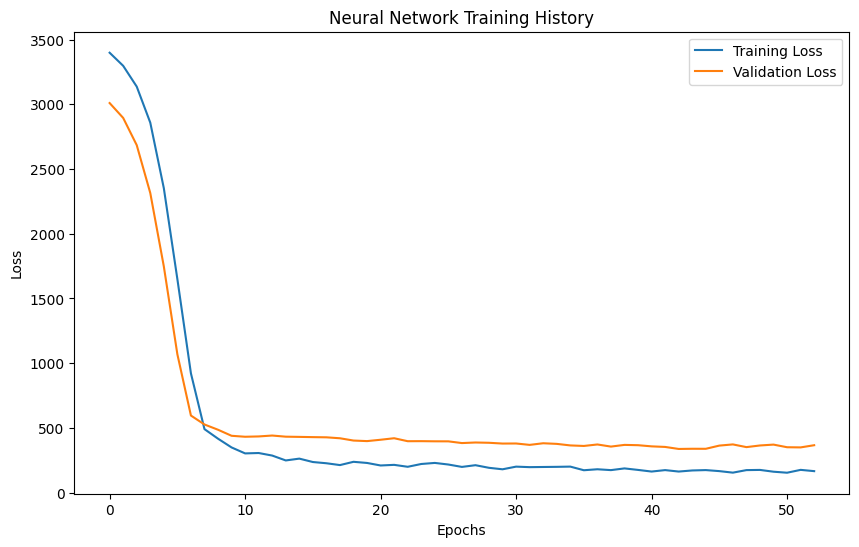

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Neural Network - MSE: 201.5755, R2: 0.3365


In [ ]:
# Build the model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
nn_pred = nn_model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)
print(f"Neural Network - MSE: {nn_mse:.4f}, R2: {nn_r2:.4f}")

Random Forest - MSE: 28.6109, R2: 0.9058


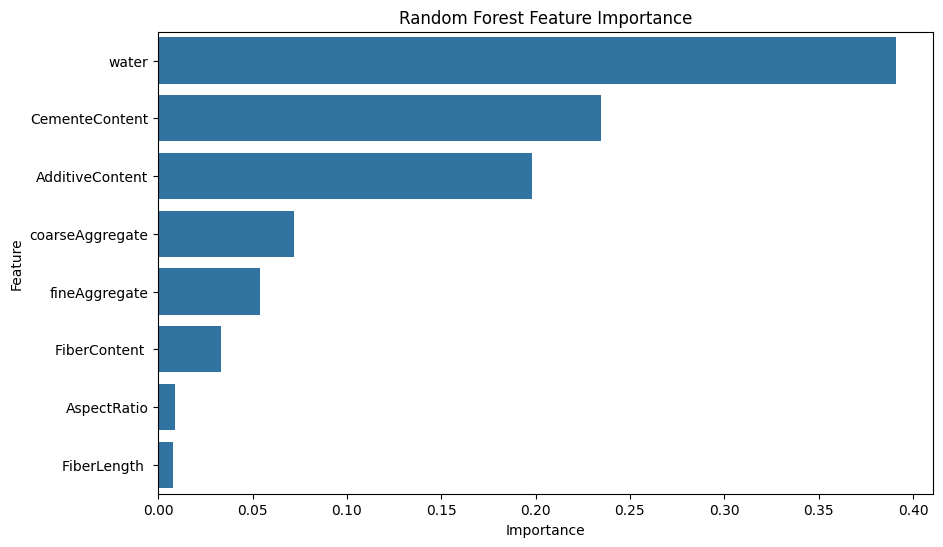

In [ ]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': data.columns[:-1],
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

XGBoost - MSE: 29.8085, R2: 0.9019


<Figure size 1000x600 with 0 Axes>

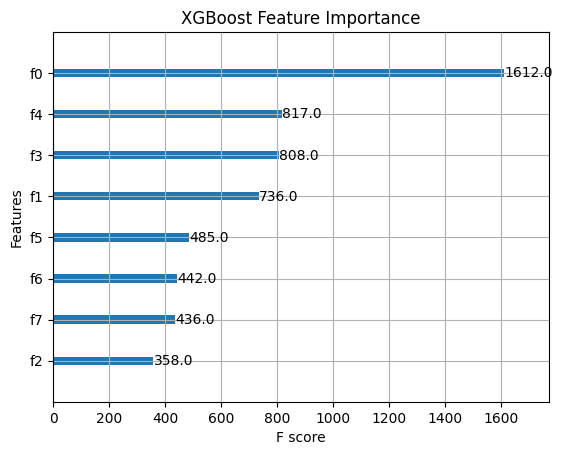

In [ ]:
# Initialize and train the model
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost - MSE: {xgb_mse:.4f}, R2: {xgb_r2:.4f}")

# Feature importance
plt.figure(figsize=(10, 6))
from xgboost import plot_importance
plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.show()


Model Comparison:
            Model         MSE  R2 Score
1   Random Forest   28.610927  0.905823
2         XGBoost   29.808542  0.901881
0  Neural Network  201.575493  0.336488


<Figure size 1000x600 with 0 Axes>

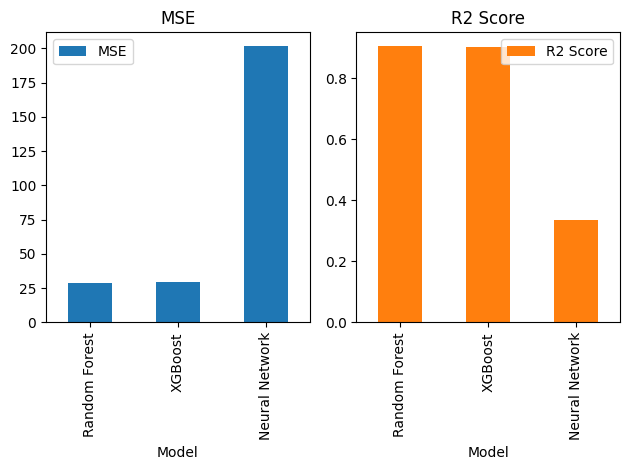

In [ ]:
# Create a comparison table
results = pd.DataFrame({
    'Model': ['Neural Network', 'Random Forest', 'XGBoost'],
    'MSE': [nn_mse, rf_mse, xgb_mse],
    'R2 Score': [nn_r2, rf_r2, xgb_r2]
}).sort_values('R2 Score', ascending=False)

print("\nModel Comparison:")
print(results)

# Visual comparison
plt.figure(figsize=(10, 6))
results.set_index('Model').plot(kind='bar', subplots=True, layout=(1, 2))
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the model and scaler
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load them later (if needed)
rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

In [ ]:
def predict_compressive_strength(input_features):
    """
    Predicts compressive strength using the trained Random Forest model.

    Args:
        input_features (list): List of 8 input features in this order:
            [FiberContent, AspectRatio, FiberLength, fineAggregate,
             coarseAggregate, water, AdditiveContent, CementeContent]

    Returns:
        float: Predicted compressive strength
    """
    # Convert input to numpy array and scale
    input_array = np.array([input_features])
    input_scaled = scaler.transform(input_array)

    # Predict using Random Forest
    prediction = rf_model.predict(input_scaled)
    return prediction[0]

In [ ]:
# Get user input
print("Enter the following values to predict compressive strength:")
features = [
    "FiberContent", "AspectRatio", "FiberLength",
    "fineAggregate", "coarseAggregate", "water",
    "AdditiveContent", "CementeContent"
]

user_input = []
for feature in features:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Predict
prediction = predict_compressive_strength(user_input)
print(f"\nPredicted Compressive Strength: {prediction:.2f} MPa")

Enter the following values to predict compressive strength:
FiberContent: 78.5
AspectRatio: 60
FiberLength: 30
fineAggregate: 916
coarseAggregate: 829
water: 225
AdditiveContent: 5
CementeContent: 410

Predicted Compressive Strength: 36.07 MPa
